In [557]:
import pandas as pd
import numpy as np
import scipy 
from math import sqrt 
import matplotlib.pyplot as plt
#estimators the linear_model Estimator Object was used to access the LinearRegression algorithm from the sklearn base
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [558]:
#cross validation sklearn.cross_validation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [573]:
rawData = pd.read_csv('default of credit card clients edited.csv', header=0)

In [574]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   X1LIMIT_BAL                  30000 non-null  int64
 1   X2SEX                        30000 non-null  int64
 2   X3EDUCATION                  30000 non-null  int64
 3   X4MARRIAGE                   30000 non-null  int64
 4   X5AGE                        30000 non-null  int64
 5   X6PAY_0                      30000 non-null  int64
 6   X7PAY_2                      30000 non-null  int64
 7   X8PAY_3                      30000 non-null  int64
 8   X9PAY_4                      30000 non-null  int64
 9   X10PAY_5                     30000 non-null  int64
 10  X11PAY_6                     30000 non-null  int64
 11  X12BILL_AMT1                 30000 non-null  int64
 12  X13BILL_AMT2                 30000 non-null  int64
 13  X14BILL_AMT3                 30000 non-null  i

In [575]:
#1. Select the features
#variableName = dataframe.iloc[:,0:4]
#features
features = rawData.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,X1LIMIT_BAL,X2SEX,X3EDUCATION,X4MARRIAGE,X5AGE,X6PAY_0,X7PAY_2,X8PAY_3,X9PAY_4,X10PAY_5,...,X14BILL_AMT3,X15BILL_AMT4,X16BILL_AMT5,X17BILL_AMT6,X18PAY_AMT1,X19PAY_AMT2,X20PAY_AMT3,X21PAY_AMT4,X22PAY_AMT5,X23PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [576]:
#2. Select the Dependent Variable

#dependent variable
depVar = rawData['Ydefault_payment_next_month']

rawData.count

<bound method DataFrame.count of        X1LIMIT_BAL  X2SEX  X3EDUCATION  X4MARRIAGE  X5AGE  X6PAY_0  X7PAY_2  \
0            20000      2            2           1     24        2        2   
1           120000      2            2           2     26       -1        2   
2            90000      2            2           2     34        0        0   
3            50000      2            2           1     37        0        0   
4            50000      1            2           1     57       -1        0   
...            ...    ...          ...         ...    ...      ...      ...   
29995       220000      1            3           1     39        0        0   
29996       150000      1            3           2     43       -1       -1   
29997        30000      1            2           2     37        4        3   
29998        80000      1            3           1     41        1       -1   
29999        50000      1            2           1     46        0        0   

       X8PAY_3  X9

In [592]:
#3. Establish the training set for the X-variables or Feature space (70/30 split)

#Training Set (Feature Space: X Training)
X_train = (features[: 2100])
X_train.head()

,X1LIMIT_BAL,X2SEX,X3EDUCATION,X4MARRIAGE,X5AGE,X6PAY_0,X7PAY_2,X8PAY_3,X9PAY_4,X10PAY_5,...,X14BILL_AMT3,X15BILL_AMT4,X16BILL_AMT5,X17BILL_AMT6,X18PAY_AMT1,X19PAY_AMT2,X20PAY_AMT3,X21PAY_AMT4,X22PAY_AMT5,X23PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [593]:
X_train_scaled=scaler.transform(X_train)
X_train_scaled.shape


(2100, 23)

In [594]:
from sklearn import preprocessing
X_scaled = preprocessing.robust_scale(X_train)
X_scaled.shape

(2100, 23)

In [595]:
X_scaled.mean(axis=0)


array([ 0.14132275, -0.41761905, -0.19666667, -0.41619048,  0.10069597,
       -0.02142857, -0.15619048, -0.17380952, -0.26809524, -0.27380952,
       -0.29428571,  0.48903784,  0.48582894,  0.48082368,  0.47819007,
        0.4667252 ,  0.49717762,  0.83857776,  0.71966314,  0.81981442,
        0.92341426,  0.93712302,  0.95099893])

In [596]:
X_scaled.std(axis=0)

array([0.71199202, 0.49316668, 0.75900206, 0.52474462, 0.7204739 ,
       1.11612333, 1.19538189, 1.25310273, 1.18644374, 1.16895548,
       1.1964494 , 1.24469359, 1.2585732 , 1.28735135, 1.37359209,
       1.31622877, 1.36543713, 3.41839729, 3.33297951, 3.20871287,
       3.87427323, 4.64888133, 5.06783558])

In [597]:
#If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. 
#In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.
scaler = preprocessing.RobustScaler().fit(X_train)
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [598]:
scaler.scale_

array([1.800000e+05, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.300000e+01, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 5.928025e+04,
       5.712625e+04, 5.248700e+04, 4.734875e+04, 4.657525e+04,
       4.602550e+04, 4.045250e+03, 4.413250e+03, 3.773250e+03,
       3.760000e+03, 3.744000e+03, 4.000000e+03])

In [599]:
#4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)
#Dependent Variable Training Set (y Training)
y_train = depVar[: 2100]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 2100


0    1
1    1
2    0
3    0
4    0
Name: Ydefault_payment_next_month, dtype: int64

In [601]:
#5. Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-900:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())



The number of observations in the feature testing set is: 900
       X1LIMIT_BAL  X2SEX  X3EDUCATION  X4MARRIAGE  X5AGE  X6PAY_0  X7PAY_2  \
29100       320000      2            3           1     52       -2       -2   
29101        80000      2            2           2     56        0        0   
29102       180000      2            2           1     58       -2       -2   
29103        60000      2            2           2     51        0        0   
29104       440000      2            1           1     54        0        0   

       X8PAY_3  X9PAY_4  X10PAY_5  ...  X14BILL_AMT3  X15BILL_AMT4  \
29100       -2       -2        -2  ...           218             0   
29101        0        0         0  ...         49339         50415   
29102       -2       -2        -2  ...           750          1576   
29103        0        0         0  ...         19289         19033   
29104        0        0         0  ...        169622        169140   

       X16BILL_AMT5  X17BILL_AMT6  X18PAY_

In [602]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled.shape

(900, 23)

In [603]:
#6. Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-900:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 900


29100    0
29101    0
29102    0
29103    0
29104    0
Name: Ydefault_payment_next_month, dtype: int64

In [586]:
#Cross Validation to help prevent overfitting. In Sci-Kit Learn there is a pre-built function (sklearn.cross_validation)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
#X_train.shape, X_test.shape

((1575, 23), (525, 23))

In [604]:
#Cross Validation to help prevent overfitting. In Sci-Kit Learn there is a pre-built function (sklearn.cross_validation)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_train_scaled, y_train)
X_train_scaled.shape, X_test_scaled.shape

((1575, 23), (525, 23))

In [605]:
#Building the model
#3 different Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [606]:
modelSVR.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [607]:
modelRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [608]:
modelLR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [640]:
#SVR
#Linear Kernel: K(X,Y)=XTY
#Polynomial kernel: K(X,Y)=(γ⋅XTY+r)d,γ>0
#Radial basis function (RBF) Kernel: K(X,Y)=exp(∥X−Y∥2/2σ2) which in simple form can be written as exp(−γ⋅∥X−Y∥2),γ>0
#Sigmoid Kernel: K(X,Y)=tanh(γ⋅XTY+r) which is similar to the sigmoid function in logistic regression.
# r, d, and γ are kernel parameters.
Tuned_modelSVR = SVR(verbose=True, cache_size=512)

In [610]:
#max_depth parameters controlling the size of the trees to reduce memory consumption, the size of the trees should be controlled 
#random_state controls the sampling of the features to consider when looking for the best split at each node
Tuned_modelRF = RandomForestRegressor(max_depth=2, random_state=0)

In [611]:
#LR
#The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. 
#None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
#fit_intercept set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
Tuned_modelLR = LinearRegression(n_jobs=4, fit_intercept=False)

In [641]:
Tuned_modelSVR.fit(X_train_scaled,y_train)

[LibSVM]

SVR(C=1.0, cache_size=512, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [613]:
Tuned_modelRF.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [614]:
Tuned_modelLR.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=4, normalize=False)

In [615]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Ydefault_payment_next_month, Length: 30000, dtype: int64


In [483]:
#6. Random Forest
#modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [484]:
#7. Support Vector Regression
#modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [485]:
#8. Linear Regression
#modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [486]:
#Obtain the training score. Returns three values in a Python Dictionary as follows:
#	1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#	2nd value: The time for fitting the estimator on the train set for each cv split.
#	3rd Value:  The time for scoring the estimator on the test set for each cv split. 

#Random Forest
#print(cross_val_score(modelRF, X_train, y_train)) 
#scoresRF=cross_val_score(modelRF, X_train, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scoresRF.mean(), scoresRF.std() * 2))


[0.03222324 0.037886   0.10286612 0.02742823 0.19660914]
Accuracy: 0.08 (+/- 0.13)


In [616]:
#Random Forest TUNED
print(cross_val_score(Tuned_modelRF, X_train_scaled, y_train)) 
Tuned_scoresRF=cross_val_score(Tuned_modelRF, X_train_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_scoresRF.mean(), Tuned_scoresRF.std() * 2))

[0.08763142 0.10818548 0.20032741 0.14182487 0.10755903]
Accuracy: 0.13 (+/- 0.08)


In [242]:
#Support Vector Regression
#print(cross_val_score(modelSVR, X_train, y_train)) 
#scoresSVR=cross_val_score(modelSVR, X_train, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scoresSVR.mean(), scoresSVR.std() * 2))

[-0.11503386 -0.06338357 -0.07286394 -0.09493846 -0.07142832]
Accuracy: -0.08 (+/- 0.04)


In [642]:
#Support Vector Regression TUNED
print(cross_val_score(Tuned_modelSVR, X_train_scaled, y_train)) 
Tuned_scoresSVR=cross_val_score(Tuned_modelSVR, X_train_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_scoresSVR.mean(), Tuned_scoresSVR.std() * 2))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][-0.02045057  0.04204627  0.0373918  -0.03829453  0.08756959]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy: 0.02 (+/- 0.09)


In [243]:
#Linear Regression
#print(cross_val_score(modelLR, X_train, y_train)) 
#scoresLR=cross_val_score(modelLR, X_train, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scoresLR.mean(), scoresLR.std() * 2))

[0.08594653 0.01019809 0.0273099  0.11034457 0.09919767]
Accuracy: 0.07 (+/- 0.08)


In [625]:
#Linear Regression TUNED
print(cross_val_score(Tuned_modelLR, X_train_scaled, y_train)) 
Tuned_scoresLR=cross_val_score(Tuned_modelLR, X_train_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_scoresLR.mean(), Tuned_scoresLR.std() * 2))

[-0.15406175 -0.01266199  0.01291337 -0.07257975 -0.03644121]
Accuracy: -0.05 (+/- 0.12)


In [627]:
#Random Forest
#modelRF.score(X_train,y_train)
Tuned_modelRF.score(X_train_scaled,y_train)

0.16575839422453342

In [629]:
#Support Vector Regression Model 
#modelSVR.score(X_train,y_train)
Tuned_modelSVR.score(X_train_scaled,y_train)

0.13157967735696974

In [631]:
#Linear Regression
#modelLR.score(X_train,y_train)
Tuned_modelLR.score(X_train_scaled,y_train)

-0.007764911403964847

In [90]:
#Making Predictions
#predictionsRF = modelRF.predict(X_test)
#predictionsSVR = modelSVR.predict(X_test)
#predictionsLR = modelLR.predict(X_test)

In [632]:
#Making Predictions
Tuned_predictionsRF = Tuned_modelRF.predict(X_test_scaled)
Tuned_predictionsSVR = Tuned_modelSVR.predict(X_test_scaled)
Tuned_predictionsLR = Tuned_modelLR.predict(X_test_scaled)

In [93]:
#Evaluating the Results
#RMSE is just the Square Root of MSE (mean squared error) 
#rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
#rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
#rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))

In [633]:
#Evaluating the Results
#RMSE is just the Square Root of MSE (mean squared error) 
Tuned_rmseRF = sqrt(mean_squared_error(y_test, Tuned_predictionsRF))
Tuned_rmseSVR = sqrt(mean_squared_error(y_test, Tuned_predictionsSVR))
Tuned_rmseLR = sqrt(mean_squared_error(y_test, Tuned_predictionsLR))

In [94]:
#establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared 
#predRsquaredRF = r2_score(y_test,predictionsRF)
#predRsquaredSVR = r2_score(y_test,predictionsSVR)
#predRsquaredLR = r2_score(y_test,predictionsLR)

In [634]:
#establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared 
Tuned_predRsquaredRF = r2_score(y_test,Tuned_predictionsRF)
Tuned_predRsquaredSVR = r2_score(y_test,Tuned_predictionsSVR)
Tuned_predRsquaredLR = r2_score(y_test,Tuned_predictionsLR)

In [97]:
#print('Random Forest R Squared: %.3f' % predRsquaredRF)
#print('RMSE: %.3f' % rmseRF)
#print('Support Vector Regression R Squared: %.3f' % predRsquaredSVR)
#print('RMSE: %.3f' % rmseSVR)
#print('Linear Regression R Squared: %.3f' % predRsquaredLR)
#print('RMSE: %.3f' % rmseLR)


Random Forest R Squared: 0.098
RMSE: 0.394
Support Vector Regression R Squared: -0.081
RMSE: 0.431
Linear Regression R Squared: 0.080
RMSE: 0.398


In [635]:
print('Tuned Random Forest R Squared: %.3f' % Tuned_predRsquaredRF)
print('RMSE: %.3f' % Tuned_rmseRF)
print('Tuned Support Vector Regression R Squared: %.3f' % Tuned_predRsquaredSVR)
print('RMSE: %.3f' % Tuned_rmseSVR)
print('Tuned Linear Regression R Squared: %.3f' % Tuned_predRsquaredLR)
print('RMSE: %.3f' % Tuned_rmseLR)


Tuned Random Forest R Squared: 0.128
RMSE: 0.381
Tuned Support Vector Regression R Squared: 0.030
RMSE: 0.402
Tuned Linear Regression R Squared: -0.010
RMSE: 0.410


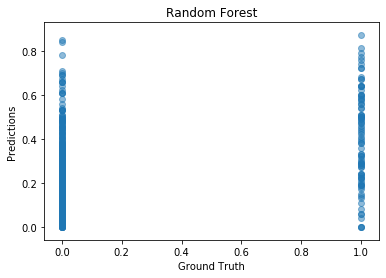

In [112]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, predictionsRF, alpha = 0.5)
#plt.title('Random Forest')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

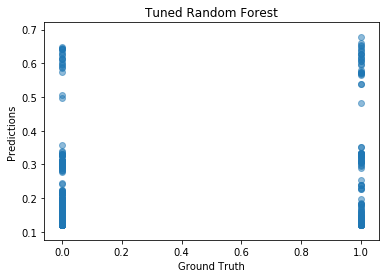

In [636]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_predictionsRF, alpha = 0.5)
plt.title('Tuned Random Forest')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

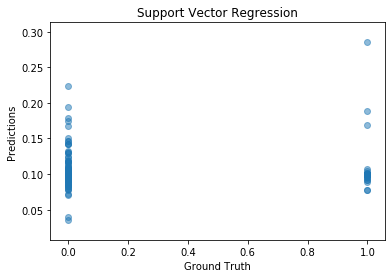

In [110]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, predictionsSVR, alpha = 0.5)
#plt.title('Support Vector Regression')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

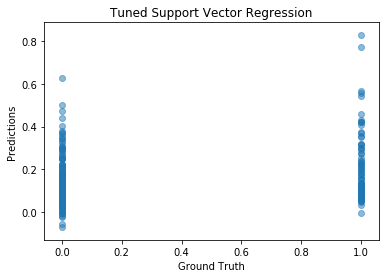

In [637]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_predictionsSVR, alpha = 0.5)
plt.title('Tuned Support Vector Regression')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

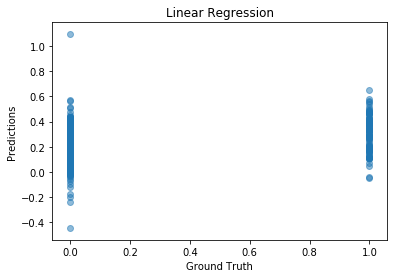

In [111]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, predictionsLR, alpha = 0.5)
#plt.title('Linear Regression')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

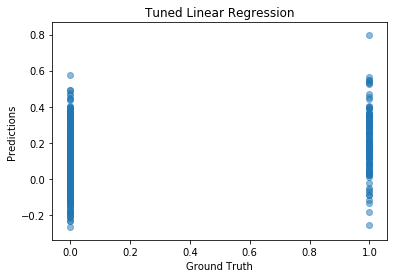

In [638]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_predictionsLR, alpha = 0.5)
plt.title('Tuned Linear Regression')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [121]:
rawData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   X1LIMIT_BAL                  30000 non-null  int64
 1   X2SEX                        30000 non-null  int64
 2   X3EDUCATION                  30000 non-null  int64
 3   X4MARRIAGE                   30000 non-null  int64
 4   X5AGE                        30000 non-null  int64
 5   X6PAY_0                      30000 non-null  int64
 6   X7PAY_2                      30000 non-null  int64
 7   X8PAY_3                      30000 non-null  int64
 8   X9PAY_4                      30000 non-null  int64
 9   X10PAY_5                     30000 non-null  int64
 10  X11PAY_6                     30000 non-null  int64
 11  X12BILL_AMT1                 30000 non-null  int64
 12  X13BILL_AMT2                 30000 non-null  int64
 13  X14BILL_AMT3                 30000 non-null  i

In [660]:
#RFE (Recursive Feature Elimination)
#featuresRFE=('X1LIMIT_BAL', 'X2SEX', 'X3EDUCATION', 'X4MARRIAGE', 'X5AGE', 'X6PAY_0', 'X7PAY_2', 'X8PAY_3', 'X9PAY_4', 
#             'X10PAY_5', 'X11PAY_6', 'X12BILL_AMT1', 'X13BILL_AMT2', 'X15BILL_AMT4', 'X17BILL_AMT6', 'X18PAY_AMT1', 
#             'X19PAY_AMT2', 'X21PAY_AMT4', 'X22PAY_AMT5', 'X23PAY_AMT6')
#locationsRFE=(0:13, 14, 16:19, 20:23)
#1. Select the features
#variableName = dataframe.iloc[:,0:4]
#features
featuresRFE = rawData[['X1LIMIT_BAL', 'X2SEX', 'X3EDUCATION', 'X4MARRIAGE', 'X5AGE', 'X6PAY_0', 'X7PAY_2', 'X8PAY_3', 'X9PAY_4', 'X10PAY_5', 'X11PAY_6', 'X12BILL_AMT1', 'X13BILL_AMT2', 'X15BILL_AMT4', 'X17BILL_AMT6', 'X18PAY_AMT1', 'X19PAY_AMT2', 'X21PAY_AMT4', 'X22PAY_AMT5', 'X23PAY_AMT6']]
print('Summary of feature sample')
featuresRFE.head()


Summary of feature sample


,X1LIMIT_BAL,X2SEX,X3EDUCATION,X4MARRIAGE,X5AGE,X6PAY_0,X7PAY_2,X8PAY_3,X9PAY_4,X10PAY_5,X11PAY_6,X12BILL_AMT1,X13BILL_AMT2,X15BILL_AMT4,X17BILL_AMT6,X18PAY_AMT1,X19PAY_AMT2,X21PAY_AMT4,X22PAY_AMT5,X23PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,3272,3261,0,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,14331,15549,1518,1500,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,28314,29547,2000,2019,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,20940,19131,2000,36681,9000,689,679


In [661]:
#2. Select the Dependent Variable

#dependent variable
depVar = rawData['Ydefault_payment_next_month']

rawData.count

<bound method DataFrame.count of        X1LIMIT_BAL  X2SEX  X3EDUCATION  X4MARRIAGE  X5AGE  X6PAY_0  X7PAY_2  \
0            20000      2            2           1     24        2        2   
1           120000      2            2           2     26       -1        2   
2            90000      2            2           2     34        0        0   
3            50000      2            2           1     37        0        0   
4            50000      1            2           1     57       -1        0   
...            ...    ...          ...         ...    ...      ...      ...   
29995       220000      1            3           1     39        0        0   
29996       150000      1            3           2     43       -1       -1   
29997        30000      1            2           2     37        4        3   
29998        80000      1            3           1     41        1       -1   
29999        50000      1            2           1     46        0        0   

       X8PAY_3  X9

In [662]:
#3. Establish the training set for the X-variables or Feature space (70/30 split)

#Training Set (Feature Space: X Training)
X_trainRFE = (featuresRFE[: 2100])
#X_trainRFE.head()

In [663]:
#If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. 
#In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.
scalerRFE = preprocessing.RobustScaler().fit(X_trainRFE)
scalerRFE

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [664]:
X_trainRFE_scaled=scalerRFE.transform(X_trainRFE)
X_trainRFE_scaled.shape

(2100, 20)

In [665]:
X_scaledRFE = preprocessing.robust_scale(X_trainRFE)
X_scaledRFE.shape

(2100, 20)

In [666]:
#4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 2100]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 2100


0    1
1    1
2    0
3    0
4    0
Name: Ydefault_payment_next_month, dtype: int64

In [667]:
#5. Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_testRFE = featuresRFE[-900:]
X_test_countRFE = len(X_testRFE.index)
print('The number of observations in the feature testing set is:',str(X_test_countRFE))
print(X_testRFE.head())

The number of observations in the feature testing set is: 900
       X1LIMIT_BAL  X2SEX  X3EDUCATION  X4MARRIAGE  X5AGE  X6PAY_0  X7PAY_2  \
29100       320000      2            3           1     52       -2       -2   
29101        80000      2            2           2     56        0        0   
29102       180000      2            2           1     58       -2       -2   
29103        60000      2            2           2     51        0        0   
29104       440000      2            1           1     54        0        0   

       X8PAY_3  X9PAY_4  X10PAY_5  X11PAY_6  X12BILL_AMT1  X13BILL_AMT2  \
29100       -2       -2        -2        -2           650          2080   
29101        0        0         0         0         49350         49533   
29102       -2       -2        -2        -2             0             0   
29103        0        0         0         0         38788         18251   
29104        0        0         0         0        293717        254498   

       X15BI

In [668]:
X_testRFE_scaled=scalerRFE.transform(X_testRFE)
X_testRFE_scaled.shape

(900, 20)

In [669]:
#6. Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-900:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 900


29100    0
29101    0
29102    0
29103    0
29104    0
Name: Ydefault_payment_next_month, dtype: int64

In [670]:
#Cross Validation to help prevent overfitting. In Sci-Kit Learn there is a pre-built function (sklearn.cross_validation)
#X_trainRFE, X_testRFE, y_train, y_test = train_test_split(X_trainRFE, y_train)
#X_trainRFE.shape, X_testRFE.shape

In [671]:
#Cross Validation to help prevent overfitting. In Sci-Kit Learn there is a pre-built function (sklearn.cross_validation)
X_trainRFE_scaled, X_testRFE_scaled, y_train, y_test = train_test_split(X_trainRFE_scaled, y_train)
X_trainRFE_scaled.shape, X_testRFE_scaled.shape

((1575, 20), (525, 20))

In [135]:
#Building the model
#3 different Models
#RFEmodelSVR = SVR()
#RFEmodelRF = RandomForestRegressor()
#RFEmodelLR = LinearRegression()

In [672]:
#Building the model
#3 different Models
Tuned_RFEmodelSVR = SVR(verbose=True, cache_size=512)
Tuned_RFEmodelRF = RandomForestRegressor(max_depth=2, random_state=0)
Tuned_RFEmodelLR = LinearRegression(n_jobs=4, fit_intercept=False)

In [136]:
#6. Random Forest
#RFEmodelRF.fit(X_trainRFE,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [673]:
#6. Random Forest
Tuned_RFEmodelRF.fit(X_trainRFE_scaled,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [137]:
#7. Support Vector Regression
#RFEmodelSVR.fit(X_trainRFE,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [674]:
#7. Support Vector Regression
Tuned_RFEmodelSVR.fit(X_trainRFE_scaled,y_train)

[LibSVM]

SVR(C=1.0, cache_size=512, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [138]:
#8. Linear Regression
#RFEmodelLR.fit(X_trainRFE,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [675]:
#8. Linear Regression
Tuned_RFEmodelLR.fit(X_trainRFE_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=4, normalize=False)

In [165]:
#Obtain the training score. Returns three values in a Python Dictionary as follows:
#	1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#	2nd value: The time for fitting the estimator on the train set for each cv split.
#	3rd Value:  The time for scoring the estimator on the test set for each cv split. 
#Array of scores of the estimator for each run of the cross validation.
#Random Forest

#print(cross_val_score(RFEmodelRF, X_trainRFE, y_train))
#RFEscoresRF=cross_val_score(RFEmodelRF, X_trainRFE, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (RFEscoresRF.mean(), RFEscoresRF.std() * 2))

[0.11157225 0.09582732 0.0636994  0.14589266 0.15581893]
Accuracy: 0.11 (+/- 0.05)


In [676]:
print(cross_val_score(Tuned_RFEmodelRF, X_trainRFE_scaled, y_train))
Tuned_RFEscoresRF=cross_val_score(Tuned_RFEmodelRF, X_trainRFE_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_RFEscoresRF.mean(), Tuned_RFEscoresRF.std() * 2))

[0.17439037 0.19636068 0.11777519 0.09743617 0.08164543]
Accuracy: 0.13 (+/- 0.09)


In [166]:
#Support Vector Regression
#print(cross_val_score(RFEmodelSVR, X_trainRFE, y_train))
#RFEscoresSVR=cross_val_score(RFEmodelSVR, X_trainRFE, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (RFEscoresSVR.mean(), RFEscoresSVR.std() * 2))

[-0.10969369 -0.09714334 -0.06362391 -0.07095832 -0.08280358]
Accuracy: -0.08 (+/- 0.03)


In [677]:
#Support Vector Regression
print(cross_val_score(Tuned_RFEmodelSVR, X_trainRFE_scaled, y_train))
Tuned_RFEscoresSVR=cross_val_score(Tuned_RFEmodelSVR, X_trainRFE_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_RFEscoresSVR.mean(), Tuned_RFEscoresSVR.std() * 2))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.08297637 0.1025383  0.00328967 0.01242938 0.08636755]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy: 0.06 (+/- 0.08)


In [167]:
#Linear Regression
#print(cross_val_score(RFEmodelLR, X_trainRFE, y_train))
#RFEscoresLR=cross_val_score(RFEmodelLR, X_trainRFE, y_train)
#print("Accuracy: %0.2f (+/- %0.2f)" % (RFEscoresLR.mean(), RFEscoresLR.std() * 2))

[0.05453404 0.06807813 0.03244369 0.115355   0.1312525 ]
Accuracy: 0.08 (+/- 0.07)


In [678]:
#Linear Regression
print(cross_val_score(Tuned_RFEmodelLR, X_trainRFE_scaled, y_train))
Tuned_RFEscoresLR=cross_val_score(Tuned_RFEmodelLR, X_trainRFE_scaled, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (Tuned_RFEscoresLR.mean(), Tuned_RFEscoresLR.std() * 2))

[-0.02845627  0.0142889  -0.09056018 -0.0478506  -0.06476984]
Accuracy: -0.04 (+/- 0.07)


In [679]:
#Random Forest
#RFEmodelRF.score(X_trainRFE,y_train)
Tuned_RFEmodelRF.score(X_trainRFE_scaled,y_train)

0.15600606874318146

In [680]:
#Support Vector Regression Model 
#RFEmodelSVR.score(X_trainRFE,y_train)
Tuned_RFEmodelSVR.score(X_trainRFE_scaled,y_train)

0.14344527482509128

In [681]:
#Linear Regression
#RFEmodelLR.score(X_trainRFE,y_train)
Tuned_RFEmodelLR.score(X_trainRFE_scaled,y_train)

-0.011608607338888133

In [142]:
#Making Predictions
#RFEpredictionsRF = RFEmodelRF.predict(X_testRFE)
#RFEpredictionsSVR = RFEmodelSVR.predict(X_testRFE)
#RFEpredictionsLR = RFEmodelLR.predict(X_testRFE)

In [682]:
#Making Predictions
Tuned_RFEpredictionsRF = Tuned_RFEmodelRF.predict(X_testRFE_scaled)
Tuned_RFEpredictionsSVR = Tuned_RFEmodelSVR.predict(X_testRFE_scaled)
Tuned_RFEpredictionsLR = Tuned_RFEmodelLR.predict(X_testRFE_scaled)

In [143]:
#Evaluating the Results
#RMSE is just the Square Root of MSE (mean squared error) 
#RFErmseRF = sqrt(mean_squared_error(y_test, RFEpredictionsRF))
#RFErmseSVR = sqrt(mean_squared_error(y_test, RFEpredictionsSVR))
#RFErmseLR = sqrt(mean_squared_error(y_test, RFEpredictionsLR))

In [683]:
#Evaluating the Results
#RMSE is just the Square Root of MSE (mean squared error) 
Tuned_RFErmseRF = sqrt(mean_squared_error(y_test, Tuned_RFEpredictionsRF))
Tuned_RFErmseSVR = sqrt(mean_squared_error(y_test, Tuned_RFEpredictionsSVR))
Tuned_RFErmseLR = sqrt(mean_squared_error(y_test, Tuned_RFEpredictionsLR))

In [144]:
#establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared 
#RFEpredRsquaredRF = r2_score(y_test,RFEpredictionsRF)
#RFEpredRsquaredSVR = r2_score(y_test,RFEpredictionsSVR)
#RFEpredRsquaredLR = r2_score(y_test,RFEpredictionsLR)

In [684]:
#establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared 
Tuned_RFEpredRsquaredRF = r2_score(y_test,Tuned_RFEpredictionsRF)
Tuned_RFEpredRsquaredSVR = r2_score(y_test,Tuned_RFEpredictionsSVR)
Tuned_RFEpredRsquaredLR = r2_score(y_test,Tuned_RFEpredictionsLR)

In [192]:
#print('Random Forest R Squared: %.3f' % RFEpredRsquaredRF)
#print('RMSE: %.3f' % RFErmseRF)
#print('Support Vector Regression R Squared: %.3f' % RFEpredRsquaredSVR)
#print('RMSE: %.3f' % RFErmseSVR)
#print('Linear Regression R Squared: %.3f' % RFEpredRsquaredLR)
#print('RMSE: %.3f' % RFErmseLR)

Random Forest R Squared: 0.020
RMSE: 0.406
Support Vector Regression R Squared: -0.079
RMSE: 0.426
Linear Regression R Squared: 0.034
RMSE: 0.403


In [685]:
print('Tuned Random Forest R Squared: %.3f' % Tuned_RFEpredRsquaredRF)
print('Tuned RMSE: %.3f' % Tuned_RFErmseRF)
print('Tuned Support Vector Regression R Squared: %.3f' % Tuned_RFEpredRsquaredSVR)
print('Tuned RMSE: %.3f' % Tuned_RFErmseSVR)
print('Tuned Linear Regression R Squared: %.3f' % Tuned_RFEpredRsquaredLR)
print('Tuned RMSE: %.3f' % Tuned_RFErmseLR)

Tuned Random Forest R Squared: 0.141
Tuned RMSE: 0.372
Tuned Support Vector Regression R Squared: 0.046
Tuned RMSE: 0.392
Tuned Linear Regression R Squared: -0.008
Tuned RMSE: 0.403


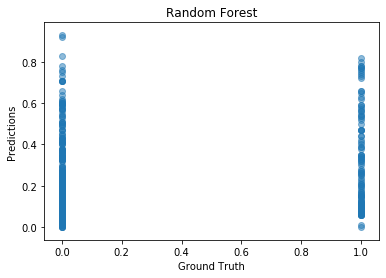

In [146]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, RFEpredictionsRF, alpha = 0.5)
#plt.title('Random Forest')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

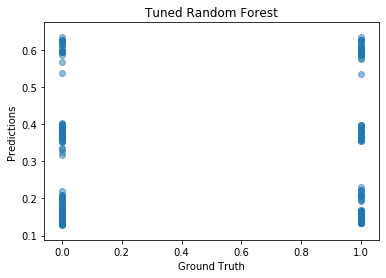

In [686]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_RFEpredictionsRF, alpha = 0.5)
plt.title('Tuned Random Forest')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

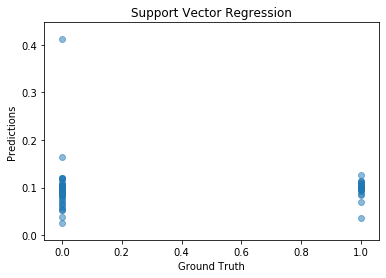

In [147]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, RFEpredictionsSVR, alpha = 0.5)
#plt.title('Support Vector Regression')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

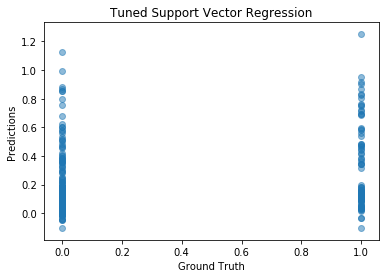

In [687]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_RFEpredictionsSVR, alpha = 0.5)
plt.title('Tuned Support Vector Regression')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

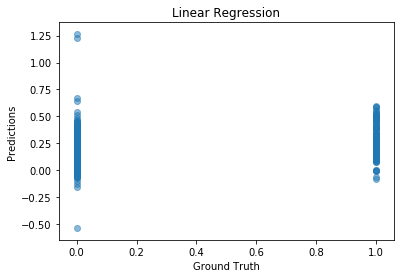

In [149]:
#Plotting the Results (scatter plot) 
#plt.scatter(y_test, RFEpredictionsLR, alpha = 0.5)
#plt.title('Linear Regression')
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

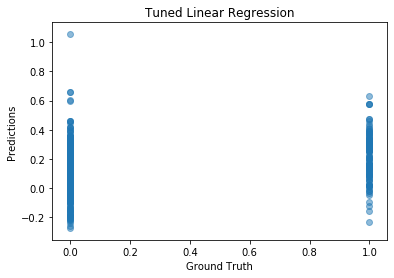

In [688]:
#Plotting the Results (scatter plot) 
plt.scatter(y_test, Tuned_RFEpredictionsLR, alpha = 0.5)
plt.title('Tuned Linear Regression')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [265]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(features)
robust_cov

MinCovDet(assume_centered=False, random_state=None, store_precision=True,
          support_fraction=None)

In [266]:
# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(features)
emp_cov

EmpiricalCovariance(assume_centered=False, store_precision=True)